### Homework
1. Do clustering on the digits dataset from sklearn using at least three different approaches
2. Evaluate the quality of clustering using three metrics from the lecture
3. Apply dimensionality reduction, then do clustering and calculate metrics.
4. Make a comparison table of different clustering approaches with and without dimensionality reduction.

In this task, we want to use 10 clusters, as we have 10 digits.

In [191]:
# !pip install scikit-learn-extra
# !pip install umap-learn

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans, AffinityPropagation, AgglomerativeClustering, Birch
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from umap import UMAP

In [193]:
digits = datasets.load_digits()

print(digits.data.shape)
print(digits.DESCR)

X, y = digits.data, digits.target
X, y

(1797, 64)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This gene

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

<Figure size 640x480 with 0 Axes>

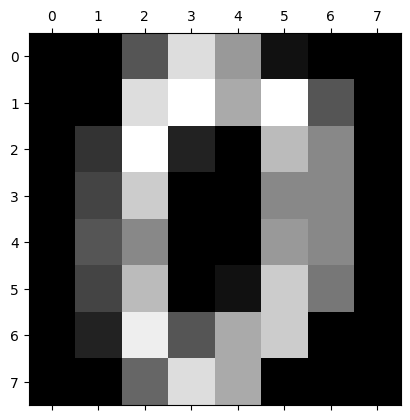

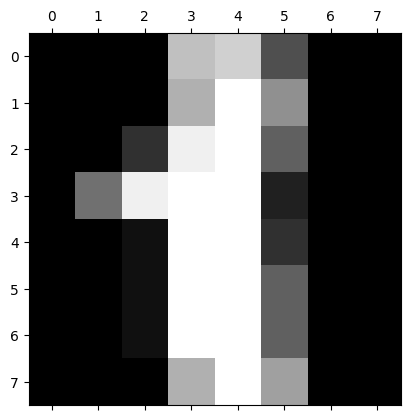

In [194]:
plt.gray()
for i in range(2):
    plt.matshow(digits.images[i])
plt.show()

In [195]:
def calculate_metrics(model_name, data, labels, labels_predicted):
    ami_score_result = adjusted_mutual_info_score(labels, labels_predicted)
    ar_score_result = adjusted_rand_score(labels, labels_predicted)
    silhouette_score_result = silhouette_score(data, labels_predicted)
    
    if print_metrics:
        print(f'Model: {model_name}')    
        print(f"adjusted_mutual_info_score: {ami_score_result}")
        print(f"adjusted_rand_score: {ar_score_result}")
        print(f"silhouette_score: {silhouette_score_result}")
        print("-------------------------------------")
    
    return (model_name, ami_score_result, ar_score_result, silhouette_score_result)

print_metrics = True
scores = pd.DataFrame(columns=['model', 'ami', 'ar', 'silhouette'])

In [196]:
def run_KMeans(model_name, X, y):
    kmeans = KMeans(n_clusters=10)
    kmeans.fit(X)
    scores.loc[len(scores)] = calculate_metrics(model_name, X, y, kmeans.labels_)
    
run_KMeans("KMeans", X, y)

Model: KMeans
adjusted_mutual_info_score: 0.7363629149652884
adjusted_rand_score: 0.6646144662046113
silhouette_score: 0.18216275455773634
-------------------------------------


In [197]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
run_KMeans("KMeans scaled", X_scaled, y)

Model: KMeans scaled
adjusted_mutual_info_score: 0.6650441713755093
adjusted_rand_score: 0.5303929244202932
silhouette_score: 0.12505732126415792
-------------------------------------


Scaler makes the result worse

### Try other clustering algorithms that support number of clusters as parameter

In [198]:
def run_GaussianMixture(model_name, X, y):
    model = GaussianMixture(n_components=10)
    labels_predicted = model.fit_predict(X)
    scores.loc[len(scores)] = calculate_metrics(model_name, X, y, labels_predicted)
    

def run_Birch(model_name, X, y):
    model = Birch(n_clusters=10)
    labels_predicted = model.fit_predict(X)
    scores.loc[len(scores)] = calculate_metrics(model_name, X, y, labels_predicted)


def run_KMedoids(model_name, X, y):
    model = KMedoids(n_clusters=10)
    labels_predicted = model.fit_predict(X)
    scores.loc[len(scores)] = calculate_metrics(model_name, X, y, labels_predicted)


run_GaussianMixture('GaussianMixture', X, y)
run_Birch('Birch', X, y)
run_KMedoids('KMedoids', X, y)

Model: GaussianMixture
adjusted_mutual_info_score: 0.7095629691363494
adjusted_rand_score: 0.560388506500907
silhouette_score: 0.16382908403700217
-------------------------------------
Model: Birch
adjusted_mutual_info_score: 0.8668321489750319
adjusted_rand_score: 0.7940031835568753
silhouette_score: 0.17849659940596496
-------------------------------------
Model: KMedoids
adjusted_mutual_info_score: 0.5158614671165285
adjusted_rand_score: 0.38804597814309
silhouette_score: 0.10670114255039931
-------------------------------------


In [199]:
def run_AgglomerativeClustering(model_name, X, y, linkage):
    model = AgglomerativeClustering(n_clusters=10, linkage=linkage)
    labels_predicted = model.fit_predict(X)
    scores.loc[len(scores)] = calculate_metrics(model_name, X, y, labels_predicted)
    

for linkage in ['ward', 'average', 'complete', 'single']:
    run_AgglomerativeClustering(f'Agglomerative - {linkage}', X, y, linkage)

Model: Agglomerative - ward
adjusted_mutual_info_score: 0.8668321489750319
adjusted_rand_score: 0.7940031835568753
silhouette_score: 0.17849659940596496
-------------------------------------
Model: Agglomerative - average
adjusted_mutual_info_score: 0.7103101155580303
adjusted_rand_score: 0.5142255948681158
silhouette_score: 0.14662473962932557
-------------------------------------
Model: Agglomerative - complete
adjusted_mutual_info_score: 0.6091974206985209
adjusted_rand_score: 0.4286888142937744
silhouette_score: 0.1192708999859292
-------------------------------------
Model: Agglomerative - single
adjusted_mutual_info_score: 8.438956846943179e-05
adjusted_rand_score: 4.313084144605482e-05
silhouette_score: -0.1336211433529001
-------------------------------------


In [200]:
scores.sort_values(by='ami', ascending=False)

,model,ami,ar,silhouette
3,Birch,0.866832,0.794003,0.178497
5,Agglomerative - ward,0.866832,0.794003,0.178497
0,KMeans,0.736363,0.664614,0.182163
6,Agglomerative - average,0.710310,0.514226,0.146625
2,GaussianMixture,0.709563,0.560389,0.163829
1,KMeans scaled,0.665044,0.530393,0.125057
7,Agglomerative - complete,0.609197,0.428689,0.119271
4,KMedoids,0.515861,0.388046,0.106701
8,Agglomerative - single,0.000084,0.000043,-0.133621


In [201]:
model_aff = AffinityPropagation()
model_aff.fit(X)
max(model_aff.labels_)

102

That's too many clusters

In [202]:
feature_count = X.shape[1]
random_state = 0

pca_50pc = PCA(n_components=int(feature_count*0.50), random_state=random_state)
pca_2 = PCA(n_components=2, random_state=random_state)

X_pca_50pc = pca_50pc.fit_transform(X)
X_pca_2 = pca_2.fit_transform(X)


tsne = TSNE(random_state=random_state)
X_tsne = tsne.fit_transform(X)


umap = UMAP(random_state=random_state)
umap_n5 = UMAP(n_neighbors=5, random_state=random_state)

X_umap = umap.fit_transform(X)
X_umap_n5 = umap_n5.fit_transform(X)


c:\Python\envs\ds1\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Python\envs\ds1\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [203]:
def run_all(suffix, X, y):
    run_KMeans("KMeans " + suffix, X, y)
    run_GaussianMixture('GaussianMixture ' + suffix, X, y)
    run_Birch('Birch ' + suffix, X, y)
    run_KMedoids('KMedoids ' + suffix, X, y)
    run_AgglomerativeClustering(f'Ward ' + suffix, X, y, 'ward')


print_metrics = False
scores = pd.DataFrame(columns=['model', 'ami', 'ar', 'silhouette'])

run_all('', X, y)

run_all('PCA 50%', X_pca_50pc, y)
run_all('PCA 2', X_pca_2, y)

run_all('T_SNE', X_tsne, y)
run_all('UMAP', X_umap, y)
run_all('UMAP n5', X_umap_n5, y)

scores.sort_values(by='ami', ascending=False)

,model,ami,ar,silhouette
29,Ward UMAP n5,0.926623,0.906208,0.749908
27,Birch UMAP n5,0.926623,0.906208,0.749908
26,GaussianMixture UMAP n5,0.926623,0.906208,0.749908
25,KMeans UMAP n5,0.926623,0.906208,0.749908
17,Birch T_SNE,0.920168,0.900242,0.644778
18,KMedoids T_SNE,0.911190,0.889946,0.643763
15,KMeans T_SNE,0.911003,0.889270,0.643350
19,Ward T_SNE,0.908747,0.884660,0.641893
21,GaussianMixture UMAP,0.903782,0.836677,0.733341
24,Ward UMAP,0.903459,0.820686,0.784126


# Conclusion

- If number of clusters is known, select algorithms that support such parameter.
- UMAP and T-SNE improve clustering score significantly (UMAP seems better). The most drastic change is for silhouette metric.
- PCA provided no improvement of the metrics.